In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from __future__ import print_function
import tensorflow as tf

import random
import numpy as np
import pandas as pd

import scipy.io
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import cv2

In [ ]:
import os
fl = os.path.join('/content/drive/My Drive/data/Patient_1/Patient_1','Patient_1_test_segment_0001.mat')
data = scipy.io.loadmat(fl)
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014', '__version__': '1.0', '__globals__': [], 'test_segment_1': array([[(array([[ 300,  300,  301, ..., -322, -324, -325],
       [  33,   33,   34, ..., -318, -319, -322],
       [ -91,  -91,  -90, ...,   29,   28,   27],
       ...,
       [-255, -254, -255, ..., -150, -150, -151],
       [-438, -438, -439, ...,  -40,  -38,  -37],
       [ 445,  445,  444, ..., -460, -460, -460]], dtype=int16), array([[600]], dtype=uint16), array([[5000]], dtype=uint16), array([[array(['LD_1'], dtype='<U4'), array(['LD_3'], dtype='<U4'),
        array(['LD_4'], dtype='<U4'), array(['LD_5'], dtype='<U4'),
        array(['LD_6'], dtype='<U4'), array(['LD_7'], dtype='<U4'),
        array(['LD_8'], dtype='<U4'), array(['RD_1'], dtype='<U4'),
        array(['RD_2'], dtype='<U4'), array(['RD_3'], dtype='<U4'),
        array(['RD_4'], dtype='<U4'), array(['RD_5'], dtype='<U4'),
        array(['RD_6'], dtype='<U4'), arr

In [ ]:
from scipy.io import loadmat
annots = loadmat('/content/drive/My Drive/data/Patient_1/Patient_1/Patient_1_interictal_segment_0001.mat')

In [ ]:
#channel 0
annots['interictal_segment_1'][0][0][0][0].shape

(3000000,)

In [ ]:
#channel 1
annots['interictal_segment_1'][0][0][0][1].shape

(3000000,)

In [ ]:
#Visualizing an example:
interictal_tst = '/content/drive/My Drive/data/Patient_1/Patient_1/Patient_1_interictal_segment_0001.mat'
preictal_tst = '/content/drive/My Drive/data/Patient_1/Patient_1/Patient_1_preictal_segment_0001.mat'
interictal_data = scipy.io.loadmat(interictal_tst)
preictal_data = scipy.io.loadmat(preictal_tst)

In [ ]:
interictal_array = interictal_data['interictal_segment_1'][0][0][0]
preictal_array = preictal_data['preictal_segment_1'][0][0][0]

Interictal
[ 589  590  591 ... -489 -490 -493]


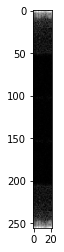

Preictal


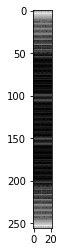

Interictal
[ 589  590  591 ... -489 -490 -493]


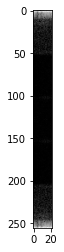

Preictal


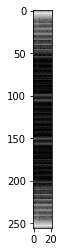

In [ ]:
# Taking 1 second worth of data of channel 0 for preictal example
# 15 channels
l = list(range(10000))
for i in l[::5000]:
    print('Interictal')
    i_secs = interictal_array[14][i:i+5000]
    print(interictal_array[14])
    i_f, i_t, i_Sxx = spectrogram(i_secs, return_onesided=False)
    i_SS = np.log1p(i_Sxx)
    plt.imshow(i_SS[:] / np.max(i_SS), cmap='gray')
    plt.show()
    print('Preictal')
    p_secs = preictal_array[1][i:i+5000]
    p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
    p_SS = np.log1p(p_Sxx)
    plt.imshow(p_SS[:] / np.max(p_SS), cmap='gray')
    plt.show()
    

In [ ]:
# Creating training and testing data
all_X = []
all_Y = []

types = ['Patient_1_interictal_segment', 'Patient_1_preictal_segment']

for i,typ in enumerate(types):
    # Looking at 18 files for each event for a balanced dataset
    for j in range(18):
        fl = '/content/drive/My Drive/data/Patient_1/Patient_1/{}_{}.mat'.format(typ, str(j + 1).zfill(4))
        data = scipy.io.loadmat(fl)
        k = typ.replace('Patient_1_', '') + '_'
        d_array = data[k + str(j + 1)][0][0][0]
        lst = list(range(3000000))  # 10 minutes   5000*600
        for m in lst[::5000]:
            arr=[]
            # Create a spectrogram every 1 second
            p_secs = d_array[0][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr1 = p_SS[:] / np.max(p_SS)
            arr.append(arr1)
            p_secs = d_array[1][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)          #P_SS spectogram
            arr2 = p_SS[:] / np.max(p_SS)   #normalize
            arr.append(arr2)
            p_secs = d_array[2][m:m+5000]
            p_f, p_t, p_Sxx = spectrogram(p_secs, fs=5000, return_onesided=False)
            p_SS = np.log1p(p_Sxx)
            arr3 = p_SS[:] / np.max(p_SS)
            arr.append(arr3)
            arr=np.reshape(arr,(256,22,3))
            resized = cv2.resize(src=arr, dsize=(128,128), interpolation = cv2.INTER_AREA)
            all_X.append(resized)
            all_Y.append(i)

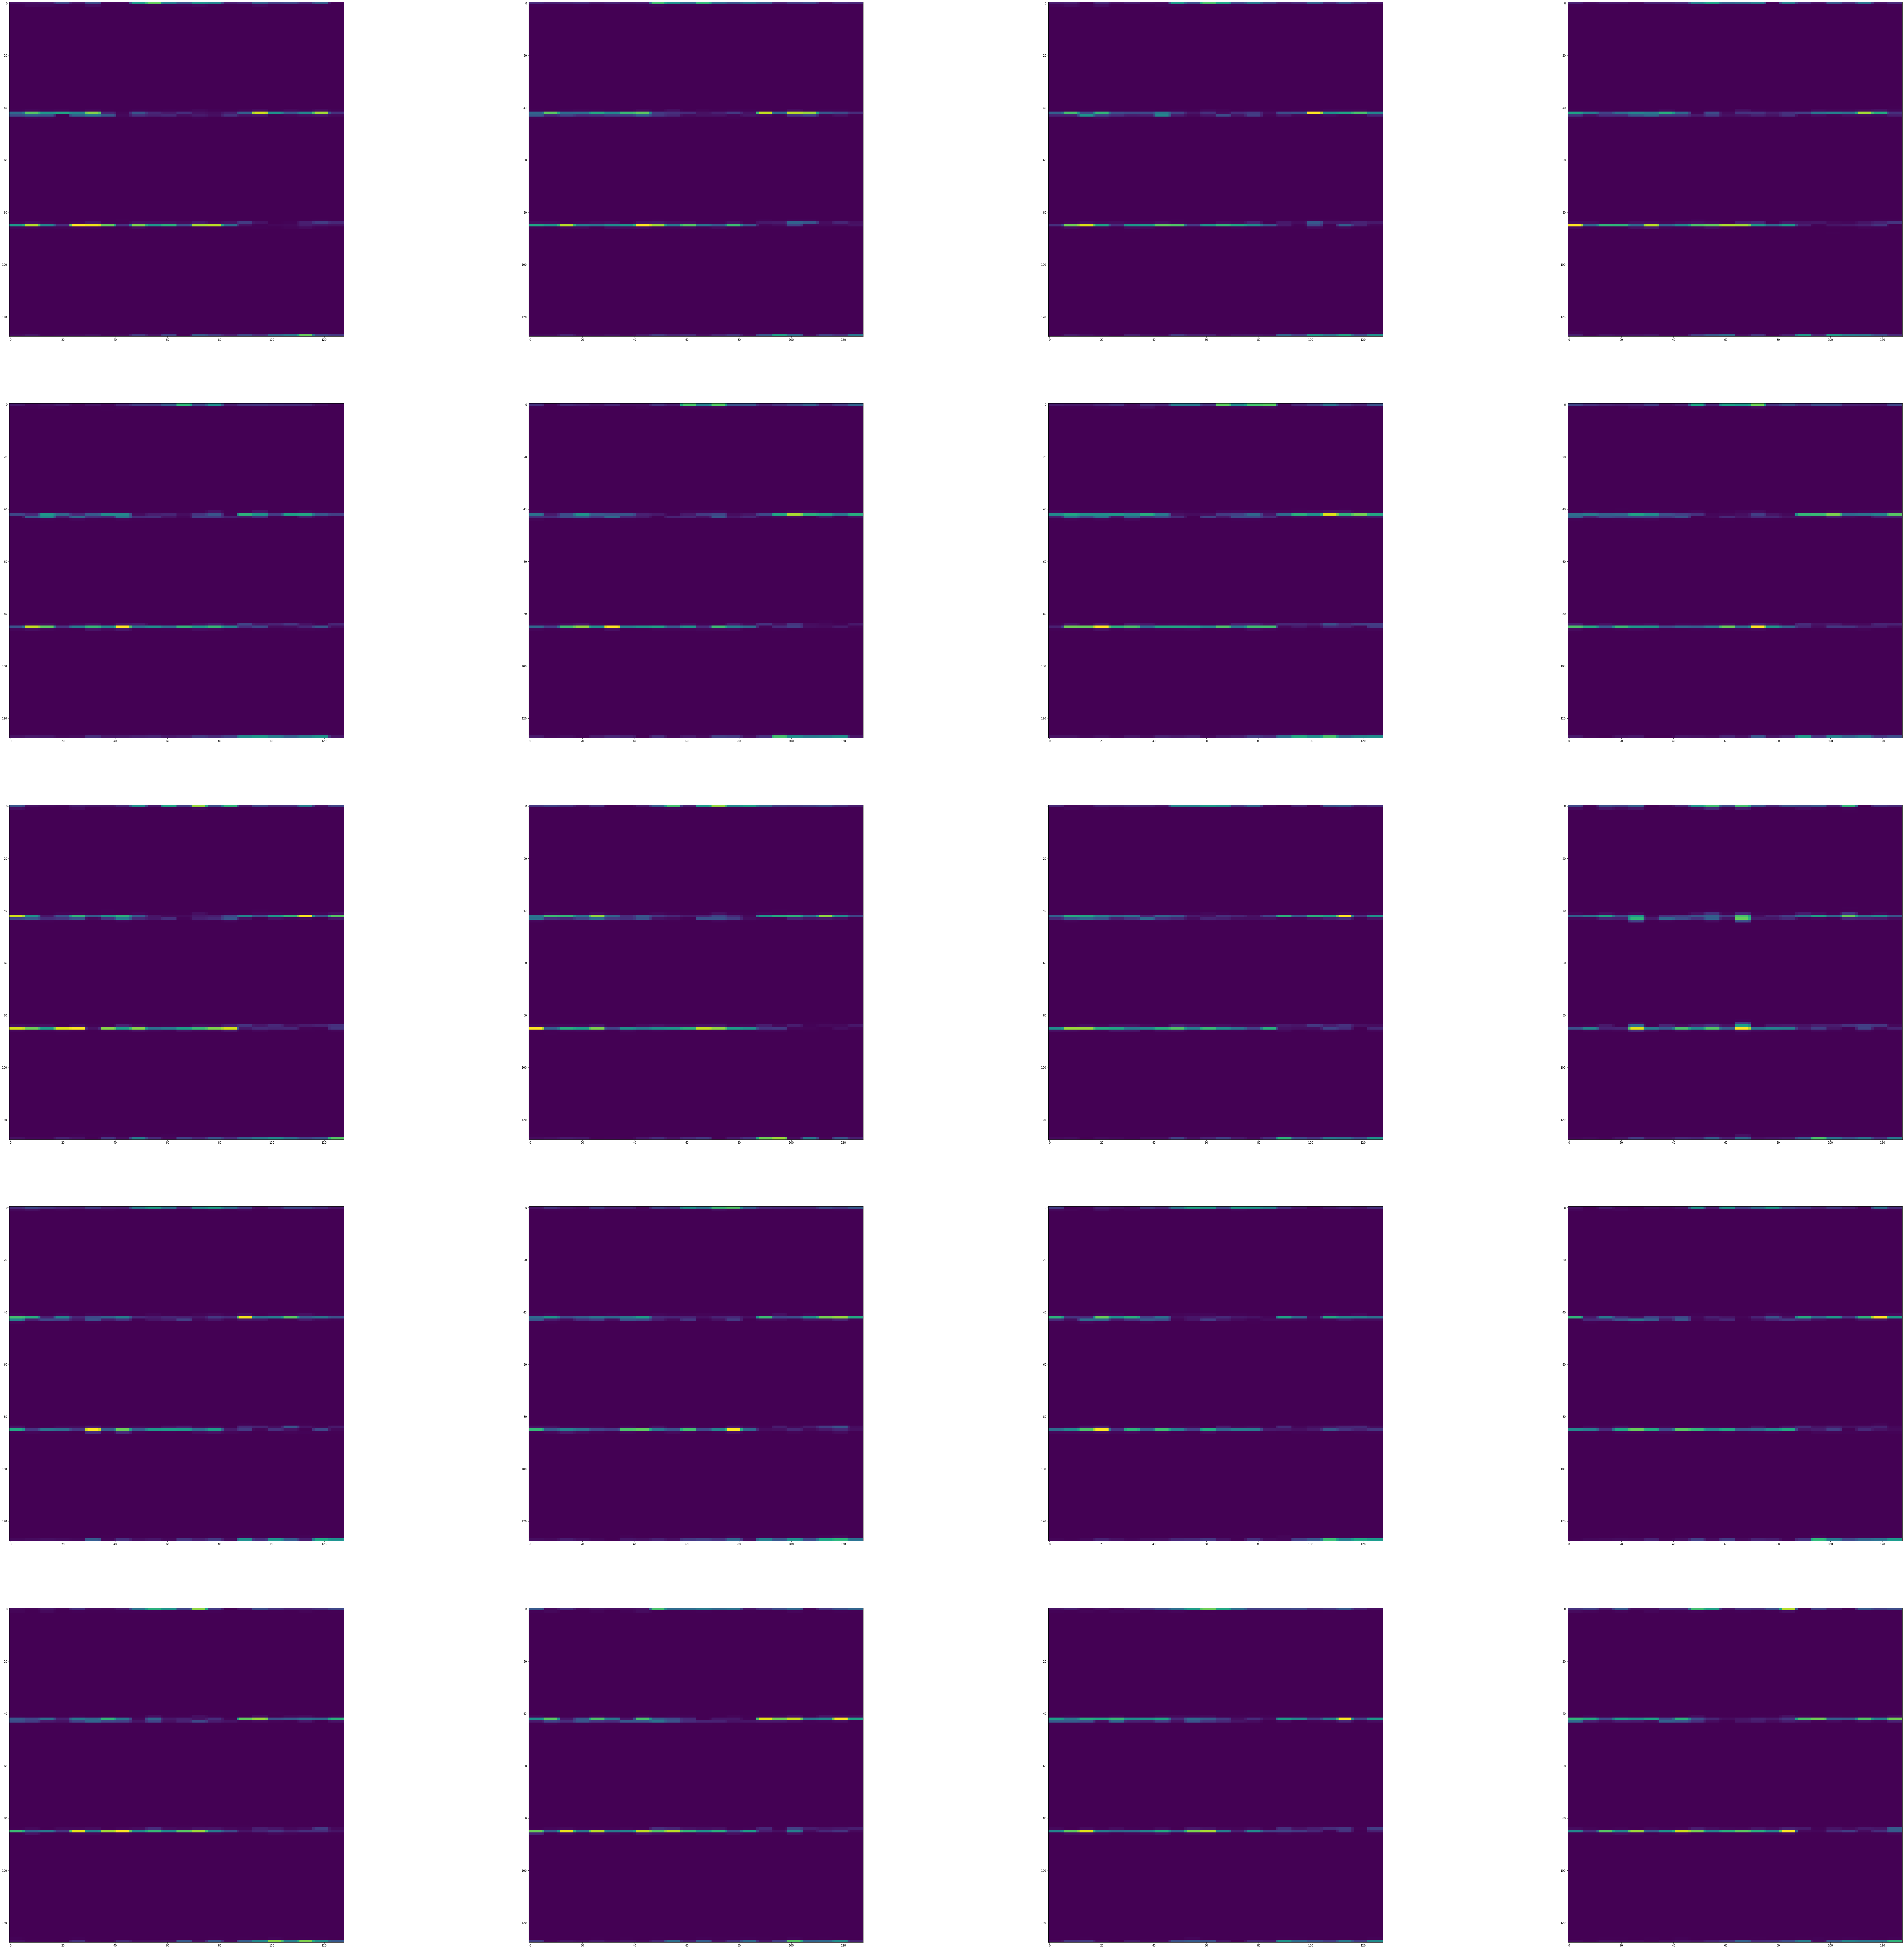

In [ ]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i][:,:,0])
plt.show()

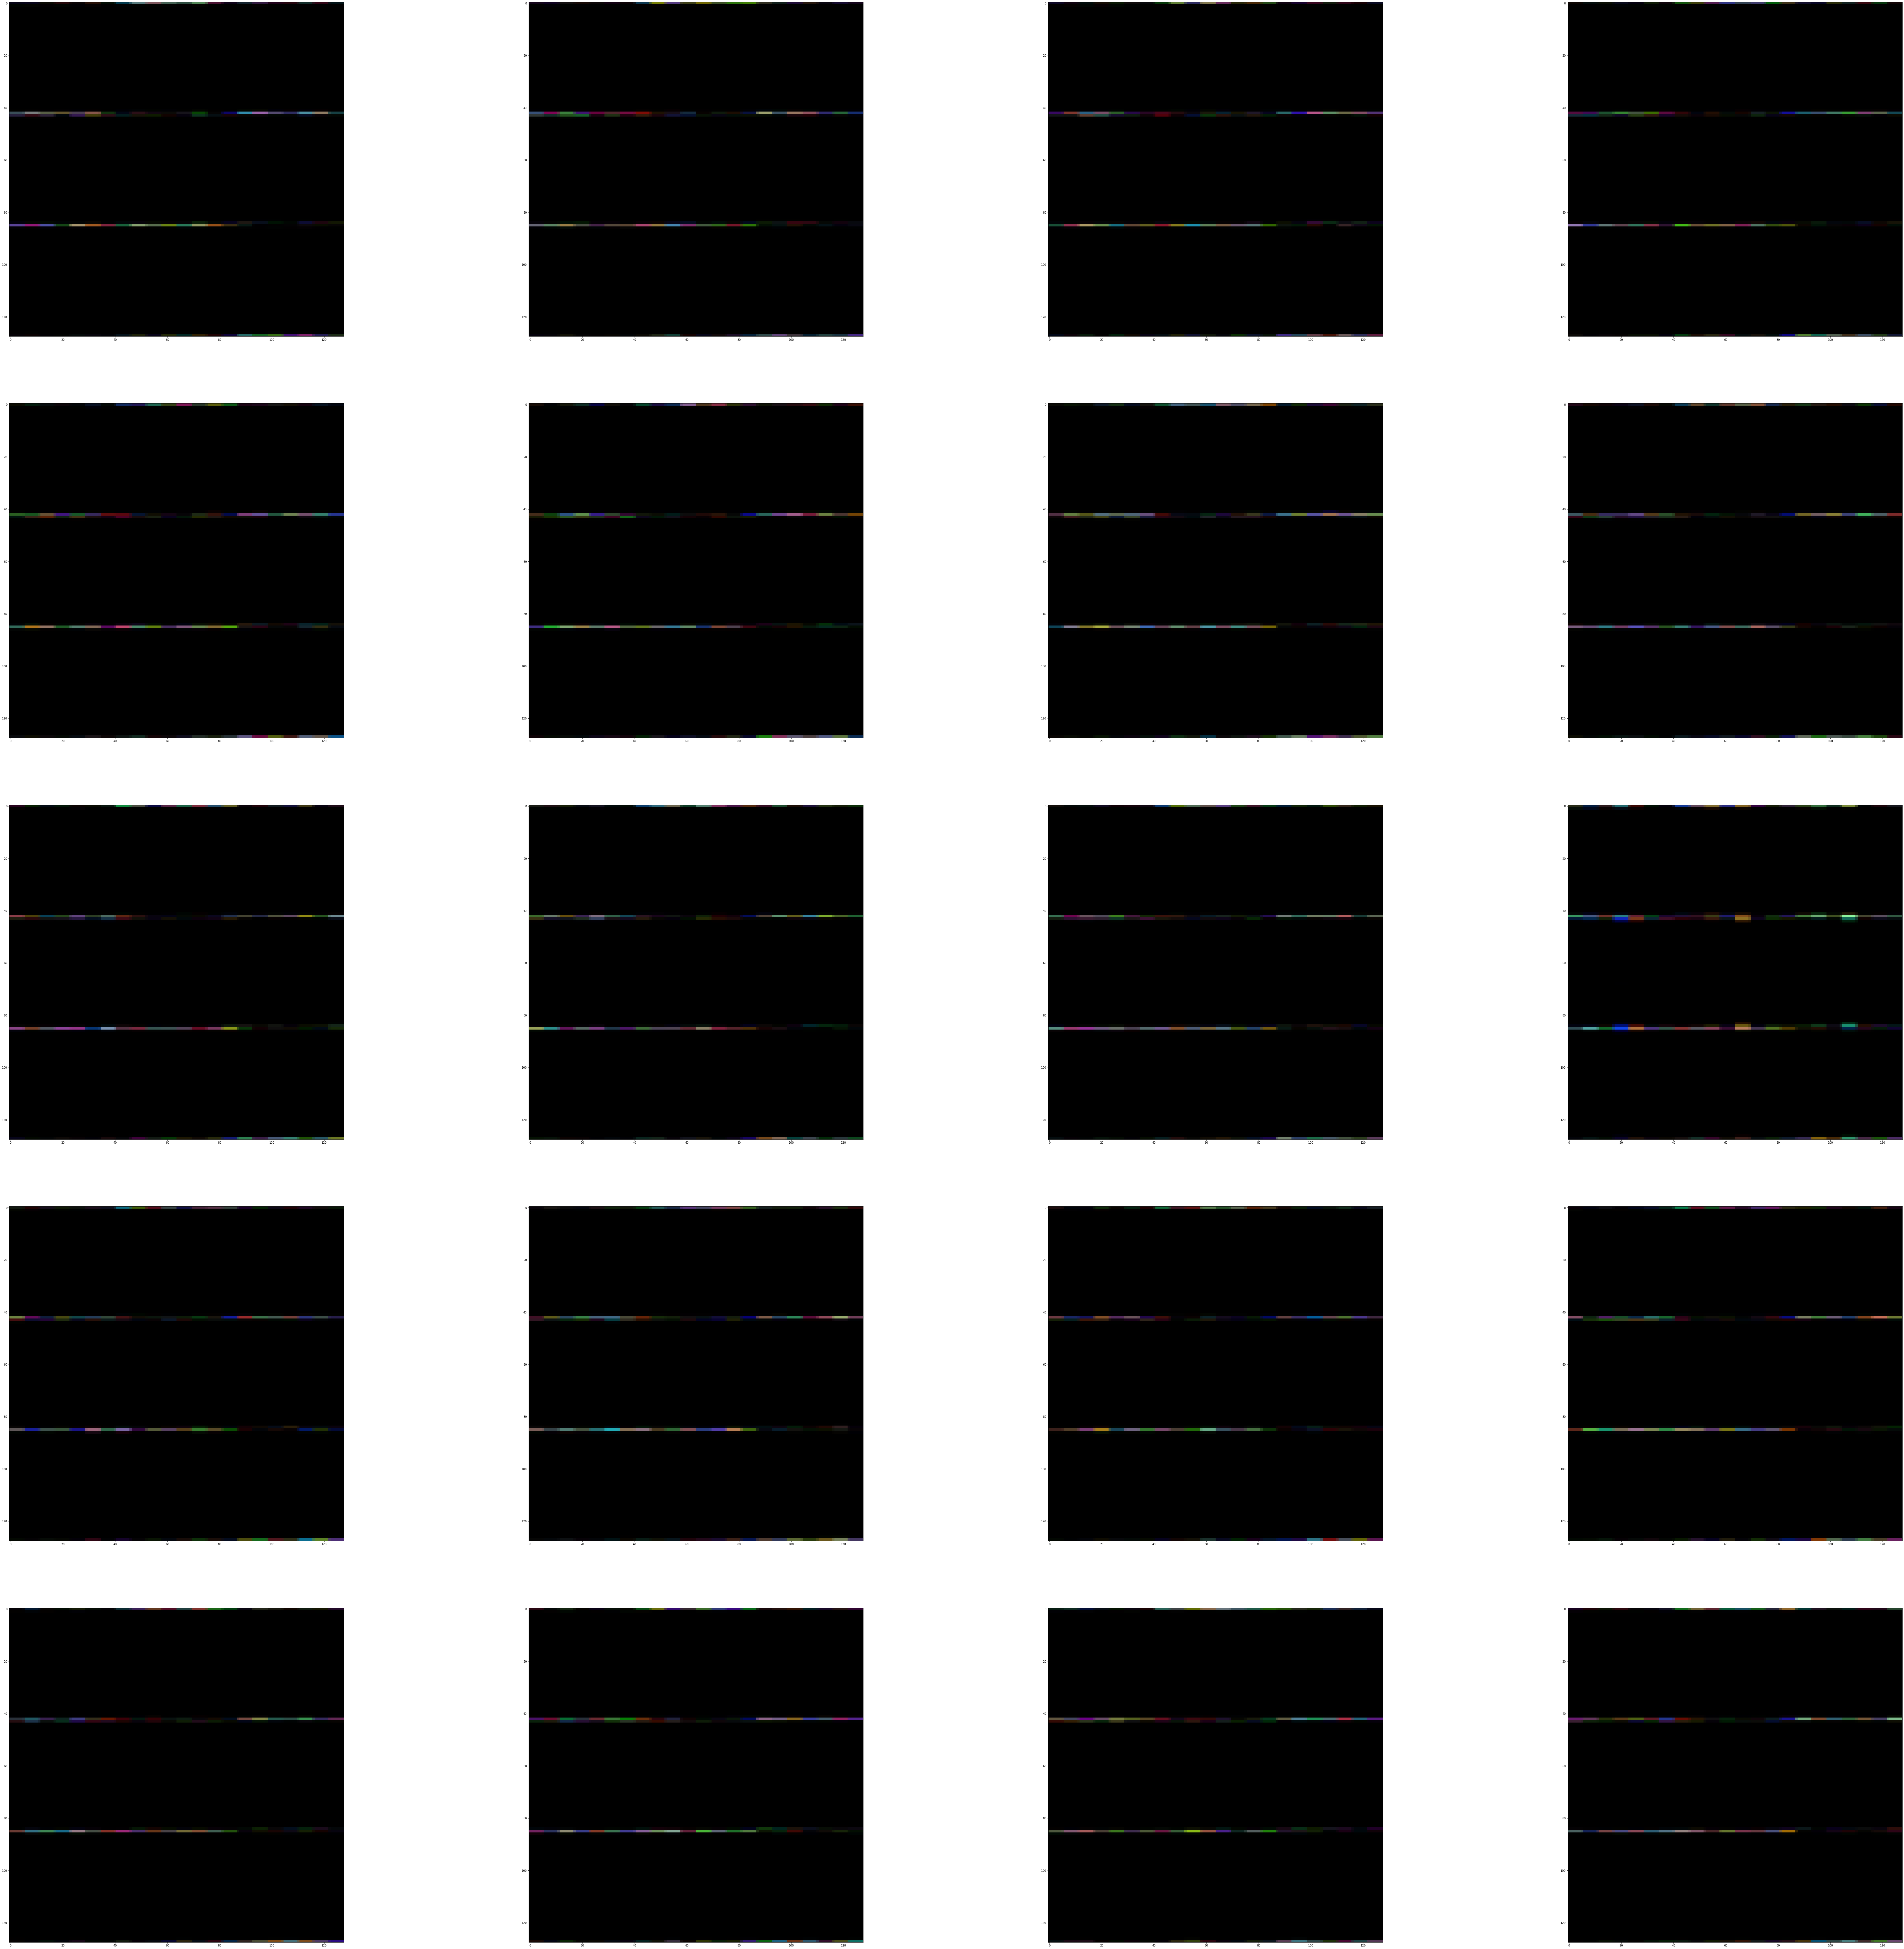

In [ ]:
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(128, 128))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_X[i])
plt.show()

In [ ]:
for i in range(len(all_X)):
  name=f'/content/images/image{i}_label{all_Y[i]}.jpg'
  plt.imsave(name,all_X[i])

In [ ]:
os.listdir('/content/images')

['image5039_label0.jpg',
 'image1415_label0.jpg',
 'image20474_label1.jpg',
 'image5190_label0.jpg',
 'image19181_label1.jpg',
 'image6751_label0.jpg',
 'image21080_label1.jpg',
 'image14228_label1.jpg',
 'image18181_label1.jpg',
 'image1305_label0.jpg',
 'image19471_label1.jpg',
 'image8983_label0.jpg',
 'image10934_label1.jpg',
 'image6524_label0.jpg',
 'image306_label0.jpg',
 'image1437_label0.jpg',
 'image10585_label0.jpg',
 'image856_label0.jpg',
 'image17868_label1.jpg',
 'image20736_label1.jpg',
 'image3893_label0.jpg',
 'image13575_label1.jpg',
 'image14445_label1.jpg',
 'image19074_label1.jpg',
 'image16873_label1.jpg',
 'image3745_label0.jpg',
 'image5759_label0.jpg',
 'image4968_label0.jpg',
 'image7156_label0.jpg',
 'image928_label0.jpg',
 'image6337_label0.jpg',
 'image3618_label0.jpg',
 'image19916_label1.jpg',
 'image18750_label1.jpg',
 'image9058_label0.jpg',
 'image8416_label0.jpg',
 'image8037_label0.jpg',
 'image9413_label0.jpg',
 'image20824_label1.jpg',
 'image858_